
# Linear Programming Lab

## Total: 40 points

In this lab, you will explore a useful extension of linear programming duality (covered in class
LP Day 1) called linear programming sensitivity analysis. Here, we aim to find:

- How does the solution change when the objective function changes?
- How does the solution change when the resource limits change?
- How does the solution change when a constraint is added to the problem?

One approach to these types of questions is solving lots of slightly different linear programming problems. This method would work, but it is inelegant and (for large problems) computationally expensive (but in most cases today, computation is cheap and computing solutions to many problems is a standard technique to study sensitivity in practice). However, there is a more elegant solution
that gives these answers just by examining the dual information provided by the Simplex Algorithm.

**Consider the following scenario:** An instrument company makes trombones and trumpets. A trombone requires 40 square inches of metal sheet and a trumpet requires 30 square inches of metal. Metal costs $1 per square inch and 40,000 square inches are available. It takes two hours of skilled labor to make a novice quality trombone or a novice quality trumpet. Three more hours of skilled labor will turn a novice quality trombone into a professional trombone. Two more hours of skilled labor will turn a novice quality trumpet into a professional trumpet. There are 6000 hours of skilled labor available. Assume that you do not need to pay for labor. Assume that you can sell fractional trombones and trumpets. The market selling prices and production costs are given in the following table:

| Product    | Market Price | Cost (metal $1/sq.in.) |
| -------- | ------- | ------- |
| Novice Trombone | $70 | $40 |
| Professional Trombone | $140 | $40 |
| Novice Trumpet | $60 | $30 |
| Professional Trumpet | $110 | $30 |

---


# Problem 1: Formulate the LP (5 points)
## 1a: Set up the LP (3 points)

Write an objective function that maximizes profits (market price - production
costs) and all constraints.

### Instructions
- Write the equations, using LaTeX, between the $$ tags. Then convert the LP problem into code by referring to this documentation: [PuLP Guide](https://realpython.com/linear-programming-python/#using-pulp)

### Solution:
Objective Function: $$ Z = (70 - 40) b_n + (140 - 40) b_p + (60 - 30) p_n + (110 - 30) p_p $$
Constraints:
- Metal usage constraint: $$ 40 (b_n + b_p) + 30 (p_n + p_p) \le 40000 $$
- Labor usage constraint: $$ 2 (b_n + p_n) + 3 b_p + 2 p_p \le 6000 $$
- Non-negativity constraint: $$ b_n,  b_p, p_n, p_p \ge 0 $$

In [56]:
from pulp import LpMaximize, LpProblem, LpVariable, LpStatus, PULP_CBC_CMD
import copy

# Define the problem
main_model = LpProblem(name="instrument-production", sense=LpMaximize) # (please do not rename this variable as it's used later in the notebook)

# Define variables
x1 = LpVariable(name="x1", lowBound=0)  # Novice Trombone
x2 = LpVariable(name="x2", lowBound=0)  # Professional Trombone
x3 = LpVariable(name="x3", lowBound=0)  # Novice Trumpet
x4 = LpVariable(name="x4", lowBound=0)  # Professional Trumpet

# Objective function
main_model += (70 - 40) * x1 + (140 - 40) * x2 + (60 - 30) * x3 + (110 - 30) * x4

# Constraints
# 1. Total metal sheet used
main_model += (40 * (x1 + x2) + 30 * (x3 + x4) <= 40000, "total_metal_sheet")

# 2. Total skilled labor hours used
main_model += (2 * (x1 + x3 + x4) + 3 * x2 <= 6000, "total_skilled_labor")

# 3. Non-negativity constraints (already enforced by lowBound=0 in variable definition)

## 1b) Solve the LP Computationally (1 point)
Use the model we created above to find the optimal profit. Run the code block below to solve the problem.

### Solution:

Optimal Profit: $106,666.67

In [57]:
# Solve the problem
main_model.solve()

1

## 1c.) What is the optimal number of each instrument to produce? (1 point)
Run the code cell below to find the optimal value for each variable in the model. Fill in the table below.
### Solution:

| Variable    | Value |
| -------- | ------- |
| `x1` | $0$ |
| `x2` | $0$ |
| `x3` | $0$ |
| `x4` | $1333 \frac{1}{3}$ |

In [58]:
for var in main_model.variables():
    print(var.name, var.value())

x1 0.0
x2 0.0
x3 0.0
x4 1333.3333


# Problem 2: Sensitivity of Novice Quality Trumpets (5 points)

## 2a) (2 points)

What would happen if the market price of novice quality trumpets went up? In other words, how much can the market price coefficient in the objective function change without causing the optimal basis to change? This is also called “allowable increase.” You are provided a helper function to find the allowable increase. Try messing with the parameters and looking at the source code in the `helpers.py` file to understand how it works.

### Solution:

If the market price of novice quality trumpets went up, not much would happen until you hit the same price as the professional quality trumpets. Once that price was reached, novice quality trumpets would start to become more profitable than professional ones.

In [59]:
from helpers import find_allowable_increase
# Run the helper to find the allowable increase for x3
allowable_increase = find_allowable_increase(base_model=main_model, var_name="x3", base_coef=60, step=5)

print(f"The allowable increase for x3 is: {allowable_increase}")

Iteration 1: Coefficient of x3: 60, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 2: Coefficient of x3: 65, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 3: Coefficient of x3: 70, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------


c:\Users\dsalmieri\Documents\GitHub\advanced-algorithms-2025-01\venv\Lib\site-packages\pulp\pulp.py:1650: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


Iteration 4: Coefficient of x3: 75, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 5: Coefficient of x3: 80, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 6: Coefficient of x3: 85, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 7: Coefficient of x3: 90, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 8: Coefficient of x3: 95, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
----------------------------------------
Iteration 9: Coefficient of x3: 100, Objective value: 106666.664, Solution: {'x1': 0.0, 'x2': 0.0, 'x3': 0.0, 'x4': 1333.3333}
--------------------------------------

## 2b) (2 points)
Would novice trumpets be more profitable than professional trumpets to produce if novice trumpets sold for the same amount as professional quality trumpets?

### Solution:
If novice trumpets were sold for the same price as professional trumpets, the only difference between them would be the amount of time they would take to make. We also have to keep in mind that we aren't paying for labor. If "more profitable" means that they have a greater impact on the total value of the system, then no, they would be exactly as profitable as professional trumpets.

## 2c) (1 point)
What would change if the price went down?

### Solution:
They then wouldn't be as profitable, and would no longer be a basic variable.

# Problem 3: Sensitivity of Novice Quality Trombones (5 points)

## 3a) (2 points)

What would happen if the market price of novice quality trombones went up? In other words, what is the “allowable increase” in the market price of novice quality trombones?


### Solution:
The allowable increase in the market price of novice quality trombones is 77. This means that once novice quality trombones are worth $77, they start to become more profitable than professional level trombones.

In [60]:
from helpers import find_allowable_increase

# setting verbose to False since we take smaller steps for this variable and don't want to print every iteration
allowable_increase = find_allowable_increase(base_model=main_model, var_name="x1", base_coef=60, step=1, max_iter=100, verbose=False)

print(f"The allowable increase for x1 is: {allowable_increase}")

Optimal basis changed at coefficient 137.

The allowable increase for x1 is: 77


## 3b) (3 points)
Would they be profitable to produce if they sold for the same amount as professional quality trombones? What would make them profitable to produce (intuitive explanation is expected, not specific numbers)?

### Solution:

In one sense, they wouldn't individually be more profitable, they would be exactly as profitable. That said, because there is a limited amount of labor hours and novice quality trombones take less time to make, more of them could be made, so they would be more profitable overall.

# Problem 4: Sensitivity of Professional Quality Trumpets (2 points)

What would happen to the optimal solution if the price of professional quality trumpets fell to $100? If there is a change, what would the new production plan and optimal profit be?

Provide your analysis and corresponding code below.

### Solution:

| Variable    | Value |
| -------- | ------- |
| `x1` | $0$ |
| `x2` | $1000$ |
| `x3` | $0$ |
| `x4` | $0$ |

There is a change, and it is that professional trombones become the optimal production plan. This is because the ratio of instrument price to material used changes, which then makes professional trombones optimal.

In [61]:
low_trumpet_model = LpProblem(name="instrument-production", sense=LpMaximize)

# Define variables
x1 = LpVariable(name="x1", lowBound=0)  # Novice Trombone
x2 = LpVariable(name="x2", lowBound=0)  # Professional Trombone
x3 = LpVariable(name="x3", lowBound=0)  # Novice Trumpet
x4 = LpVariable(name="x4", lowBound=0)  # Professional Trumpet

# TODO: Re-define Objective function
low_trumpet_model += (70 - 40) * x1 + (140 - 40) * x2 + (60 - 30) * x3 + (100 - 30) * x4

# Constraints
low_trumpet_model += 40 * x1 + 40 * x2 + 30 * x3 + 30 * x4 <= 40000, "Metal Sheet Constraint"
low_trumpet_model += 2 * x1 + 5 * x2 + 2 * x3 + 4 * x4 <= 6000, "Skilled Labor Constraint"

# Solve the low_trumpet_model
low_trumpet_model.solve(PULP_CBC_CMD(msg=0))

# Display results
print("Sensitivity Analysis for Professional Quality Trumpets (Price = $100):")
print(f"Objective value (Profit): {low_trumpet_model.objective.value()}")
for var in low_trumpet_model.variables():
    print(f"{var.name}: {var.value()}")

Sensitivity Analysis for Professional Quality Trumpets (Price = $100):
Objective value (Profit): 100000.0
x1: 0.0
x2: 1000.0
x3: 0.0
x4: 0.0


# Problem 5: Sensitivity of Metal Resources (8 points)

## 5a) (4 points)
How do production plans change when metal supplies change? At which point does metal stop being a limiting resource and how do you know?

**HINT**: To find out how the production plans change when metal supplies change, you can use a **guess-and-check approach**. 

1. Start with the current RHS of the "Metal Sheet Constraint" (40,000 square inches).
2. Gradually increase or decrease the RHS (e.g., by 1,000 or 5,000 units at a time).
3. For each adjustment:
   - Re-run to solve the problem and record the production plan (values of x_1, x_2, x_3, x_4) and the total profit.
   - Compare the new solution to the original solution (at RHS = 40,000).
4. Stop increasing when you notice the production plan has stopped changing. The last RHS value before the variable values stop changing is the **RHS Tolerance Upper Bound**.
5. Stop decreasing when the model becomes infeasible. The last RHS value before the model becomes infeasible is the **RHS Tolerance Lower Bound**.

### Solution:

RHS Tolerance Upper Bound: 90,000

RHS Tolerance Lower Bound: 0

In [62]:
rhs_tol_model = copy.deepcopy(main_model)

# Print the results
print("Initial Solution:")
print(f"Total Profit: ${rhs_tol_model.objective.value():.2f}")
print("Production Plan:")
for var in rhs_tol_model.variables():
    print(f"  {var.name}: {var.varValue}")

# Check slack for each constraint
print("\nSlack Values for Constraints:")
for name, constraint in rhs_tol_model.constraints.items():
    print(f"  {name}: RHS = {constraint.constant}, slack = {constraint.slack}")

# ---------------------------------------------
# Guess-and-Check Setup
# ---------------------------------------------
# Change the RHS of the "Metal Sheet Constraint" below and re-run this block of code.
rhs_tol_model.constraints["total_metal_sheet"].changeRHS(0)  # TODO: Change this value

print("---------------------------------------------")
print("After Adjusting Metal Sheet Constraint:")

# Re-solve the problem
rhs_tol_model.solve(PULP_CBC_CMD(msg=0))
print(f"Model Solution Status: {LpStatus[rhs_tol_model.status]}")

# Print updated results
print(f"Total Profit: ${rhs_tol_model.objective.value():.2f}")
print("Production Plan:")
for var in rhs_tol_model.variables():
    print(f"  {var.name}: {var.varValue}")

# Check slack for each constraint
print("\nSlack Values for Constraints:")
for name, constraint in rhs_tol_model.constraints.items():
    print(f"  {name}: RHS = {constraint.constant}, slack = {constraint.slack}")

Initial Solution:
Total Profit: $106666.66
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 1333.3333

Slack Values for Constraints:
  total_metal_sheet: RHS = -40000, slack = -0.0
  total_skilled_labor: RHS = -6000, slack = 3333.3333
---------------------------------------------
After Adjusting Metal Sheet Constraint:
Model Solution Status: Optimal
Total Profit: $0.00
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 0.0

Slack Values for Constraints:
  total_metal_sheet: RHS = 0, slack = -0.0
  total_skilled_labor: RHS = -6000, slack = 6000.0


## 5b) (4 points)
**What is the shadow price of metal?**  
1. Explain the concept of a shadow price in the context of the "Metal Sheet Constraint" and how it impacts the objective function (profit).  
2. Using the shadow price, calculate how much the profit is expected to change if the metal supplies increase by 500 square inches.  
3. Solve the problem again with the increased metal supplies and verify the expected profit change and the new production plan.

Use the following formula for profit change:  
$$ \Delta profit = \Delta \text{metal supplies quantity} \cdot dual_{metal} $$

---

### HINT

1. **What is the Shadow Price?**  
   The shadow price (also called the dual value) of a constraint tells you how much the objective value (profit) will change per unit increase in the RHS of the constraint, as long as the change is within the **RHS tolerance interval**.

2. **How to Find the Shadow Price?**  
   - Solve the LP model with the original RHS.
   - Check the **dual value** (`constraint.pi`) of the "Metal Sheet Constraint" in the solver's output. This is the shadow price.

3. **Useful Methods**
   - Use `shadow_model.constraints["Metal_Sheet_Constraint"].changeRHS(new_rhs)` to update the RHS of the "Metal Sheet Constraint"

### Solution:

1. The shadow price of metal is how much the total value will increase for each additional unit of metal sheet we get access to. Right now, the amount of metal sheet is the limiting factor, so increasing it will increase our value. In this case, each additional unit of metal sheet allows us to make \$2.67 more, becuase the profit from professional trumpets (our most profitable item still) divided by the amount of metal sheet they use is $\frac{110-30}{30} = \frac{80}{30} = 2.67$
2. The price should change by $2.67 * 500 = 1333.33$
3. Verified

In [63]:
main_model.constraints['total_metal_sheet'].pi

2.6666667

In [64]:
shadow_model = copy.deepcopy(main_model)

shadow_model.solve()

# Show the original results
print("Original results:")
print(f"New Profit: {shadow_model.objective.value()}")
print("Production Plan:")
for var in shadow_model.variables():
    print(f"  {var.name}: {var.value()}")

# Update the constraints and resolve
shadow_model.constraints["total_metal_sheet"].changeRHS(40500)
shadow_model.solve()

# Display the new results
print("New Results with Increased Metal Supply:")
print(f"New Profit: {shadow_model.objective.value()}")
print("Production Plan:")
for var in shadow_model.variables():
    print(f"  {var.name}: {var.value()}")

Original results:
New Profit: 106666.664
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 1333.3333
New Results with Increased Metal Supply:
New Profit: 108000.0
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 1350.0


# Problem 6: Sensitivity of Labor Resources (5 points)

## 6a) (1 point)
How much labor is unused?

HINT: What is the slack?

The slack is $3333 \frac{1}{3}$

In [65]:
print("\nSlack Values for Constraints:")
for name, constraint in main_model.constraints.items():
    print(f"  {name}: RHS = {constraint.constant}, slack = {constraint.slack}")


Slack Values for Constraints:
  total_metal_sheet: RHS = -40000, slack = -0.0
  total_skilled_labor: RHS = -6000, slack = 3333.3333


## 6b) (2 points)
How much would you be willing to pay an additional laborer?

### Solution:

I wouldn't pay for additional labor. Right now, labor is not the limiting facor (there is slack) so adding labor won't increase value. For it to be worth it for me to pay for labor, we would have to get a lot more metal sheet.

## 6c) (2 points)
Suppose that industrial regulation complicate the process so it takes an additional hour of labor to turn a novice quality instrument into a professional quality instrument. How and why does that change affect the optimal production plan and profit?

In [81]:
regulation_model = LpProblem(name="regulation", sense=LpMaximize)

x1 = LpVariable(name="x1", lowBound=0)  # Novice Trombone
x2 = LpVariable(name="x2", lowBound=0)  # Professional Trombone
x3 = LpVariable(name="x3", lowBound=0)  # Novice Trumpet
x4 = LpVariable(name="x4", lowBound=0)  # Professional Trumpet

# Objective function
regulation_model += (70 - 40) * x1 + (140 - 40) * x2 + (60 - 30) * x3 + (110 - 30) * x4

# Constraints
# 1. Total metal sheet used
regulation_model += (40 * (x1 + x2) + 30 * (x3 + x4) <= 40000, "total_metal_sheet")

# 2. Total skilled labor hours used
regulation_model += (2 * (x1 + x3) + 3 * (x2 + x4) <= 6000, "total_skilled_labor")

regulation_model.solve()

# Show the original results
print("Results:")
print(f"New Profit: {regulation_model.objective.value()}")
print("Production Plan:")
for var in regulation_model.variables():
    print(f"  {var.name}: {var.value()}")

# Check slack for each constraint
print("\nSlack Values for Constraints:")
for name, constraint in regulation_model.constraints.items():
    print(f"  {name}: RHS = {constraint.constant}, slack = {constraint.slack}")

Results:
New Profit: 106666.664
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 1333.3333

Slack Values for Constraints:
  total_metal_sheet: RHS = -40000, slack = -0.0
  total_skilled_labor: RHS = -6000, slack = 2000.0


### Solution:

This doesn't change the optimal production plan or profit because skilled labor isn't the limiting factor. Even though it takes more time to make professional trumpets, the reason that we could only make 1333.33 of them wasn't the time they took, but the material. There was enough slack in the labor constraint to absorb the increased time.

# Problem 7: Sensitivity of New Constraint (5 points)

## 7a) (4 points)
The owner of the company comes up with a design for a beautiful hand-crafted tuba. Each tuba requires 250 hours of labor (6.25 weeks of full time work) and uses 50 square inches of metal. If the
company can sell tubas for $200, would it be worthwhile to produce? Use:
$$ \text{(marginal cost of metal)}_{tuba} = \text{(metal used)}_{tuba} \cdot dual_{metal} $$

Discuss how looking at the shadow prices of metal and labor can help
you intuit whether diverting metal resources to tuba production is a good idea. Check your intuition with the solver.

### Solution:

$ \text{(marginal cost of metal)}_{tuba} = \text{(metal used)}_{tuba} \cdot dual_{metal} \rightarrow \text{(marginal cost of metal)}_{tuba} = 50 \cdot 2 \frac{2}{3} \rightarrow \text{(marginal cost of metal)}_{tuba} = 133 \frac{1}{3}$

Therefore, the potential profit for each tuba is $200 - 133 \frac{1}{3} = 66 \frac{2}{3}$, meaning it would be profitable to sell them until labor becomes a limiting factor. We can check this with the soolver and see that that's true, as the optimal solution includes selling ~13.5 tubas.

In [82]:
from pulp import LpMaximize, LpProblem, LpVariable, value

# Check shadow prices
main_model.constraints['total_metal_sheet'].pi

# Define the problem
tuba_model = LpProblem(name="instrument-production", sense=LpMaximize)

# Define variables
x1 = LpVariable(name="x1", lowBound=0)  # Novice Trombone
x2 = LpVariable(name="x2", lowBound=0)  # Professional Trombone
x3 = LpVariable(name="x3", lowBound=0)  # Novice Trumpet
x4 = LpVariable(name="x4", lowBound=0)  # Professional Trumpet
x5 = LpVariable(name="x5", lowBound=0)  # Tubas

# Define the problem and analyze the shadow prices
tuba_model += (70 - 40) * x1 + (140 - 40) * x2 + (60 - 30) * x3 + (110 - 30) * x4 + (150 - 50) * x5
tuba_model += (40 * (x1 + x2) + 30 * (x3 + x4) + 50 * x5 <= 40000, "total_metal_sheet")
tuba_model += (2 * (x1 + x3 + x4) + 3 * x2 + 250 * x5 <= 6000, "total_skilled_labor")

# Solve the problem
tuba_model.solve()

# Print the results
print(f"Total Profit: ${tuba_model.objective.value():.2f}")
print("Production Plan:")
for var in tuba_model.variables():
    print(f"  {var.name}: {var.varValue}")

# Check slack for each constraint
print("\nSlack Values for Constraints:")
for name, constraint in tuba_model.constraints.items():
    print(f"  {name}: RHS = {constraint.constant}, slack = {constraint.slack}")

Total Profit: $106666.66
Production Plan:
  x1: 0.0
  x2: 0.0
  x3: 0.0
  x4: 1333.3333
  x5: 0.0

Slack Values for Constraints:
  total_metal_sheet: RHS = -40000, slack = -0.0
  total_skilled_labor: RHS = -6000, slack = 3333.3333


## 7b) (1 point)
Is it profitable if tubas sell for $150? Why?

### Solution:

No, it isn't. We can check this quickly by rerunning the code, but we can also tell based on the marginal costs of the different items. We already know that the marginal cost of tubas is $133.33, and we can calculate that the marginal cost of professional trumpets is $30 * 2 \frac{2}{3} = 80$. By finding the difference between this and the prices, we can see that $200 tubas would give $66.67 in profit, $110 professional trumpets would give $30 in profit, and $150 trumpets would give $16.67 in profit. Therefore, if tumpets were only sold for $150, they wouldn't be profitable.

# Problem 8: Making Sense of the Dual Problem (5 points)

## 8a) (3 points)
Set up the original problem’s corresponding dual LP. Write an objective function that maximizes profits (market price - production costs) and all dual constraints.

In [84]:
from pulp import LpMinimize, LpProblem, LpVariable

# Define the dual problem
dual_model = LpProblem(name="dual-instrument-production", sense=LpMinimize)

# Define variables
y1 = LpVariable(name="y1", lowBound=0)  # Metal sheet
y2 = LpVariable(name="y2", lowBound=0)  # Labor hours

# Define the dual problem
dual_model += 40000 * y1 + 6000 * y2

# 40 40 30 30
#  2  3  2  2

# 40  2 = 70 - 40
# 40  3 = 140 - 40
# 30  2 = 60 - 30
# 30  2 = 110 - 30

# Constraints
dual_model += (40 * y1 + 2 * y2 >= 70 - 40, "novice trombones")
dual_model += (40 * y1 + 3 * y2 >= 140 - 40, "professional trombones")
dual_model += (30 * y1 + 2 * y2 >= 60 - 30, "novice trumpets")
dual_model += (30 * y1 + 2 * y2 >= 110 - 30, "professional trumpets")

## 8b) (1 point)
Run the code block below to solve the problem. What is the optimal profit? Give a plot of the constraints (you can use this [example](https://github.com/hakeemrehman/Python-PuLP-/blob/master/LP%20Using%20PuLP%20and%20Graphical%20Sol..ipynb) for guidance).

Dual Problem Results:
Optimal Value (Total Resource Value): 106666.66799999999


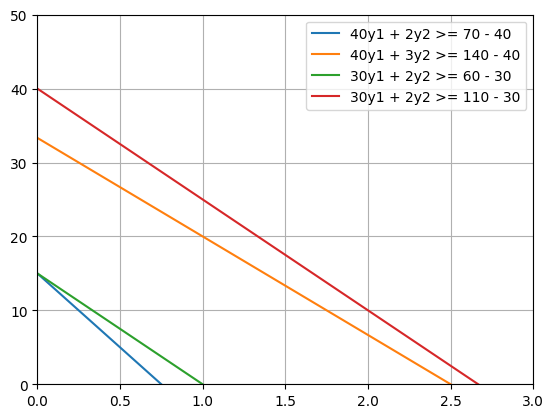

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Solve the dual problem
dual_model.solve(PULP_CBC_CMD(msg=0))

# Display the results
print("Dual Problem Results:")
print(f"Optimal Value (Total Resource Value): {dual_model.objective.value()}")

# Plot the optimal solution
x = np.arange(0, 4)
plt.plot(x, -20 * x + 15, label = '40y1 + 2y2 >= 70 - 40')
plt.plot(x, -13.333 * x + 33.333, label = '40y1 + 3y2 >= 140 - 40')
plt.plot(x, -15 * x + 15, label = '30y1 + 2y2 >= 60 - 30')
plt.plot(x, -15 * x + 40, label = '30y1 + 2y2 >= 110 - 30')

plt.axis([0, 3, 0, 50])
plt.grid(True)
plt.legend()
plt.show()

## 8c) (1 point)
Say something about the relationship between dual variables and slackness in the primal and dual problem.

### Solution:

They correspond to each other. Each slack variable in the primal is a dual variable, and vice versa.